# Information
## Source
This notebook prepares the data from Lawley et al. (2022) using the version from https://drive.google.com/file/d/1jyxbPmwhMEhgezxMTxwmKTuU1PhT9yPe using the original H3 hexagonal polygon data.

**Citaton**: <p>
Christopher J.M. Lawley, Anne E. McCafferty, Garth E. Graham, David L. Huston, Karen D. Kelley, Karol Czarnota, Suzanne Paradis, Jan M. Peter, Nathan Hayward, Mike Barlow, Poul Emsbo, Joshua Coyan, Carma A. San Juan, Michael G. Gadd: <br>
Data–driven prospectivity modelling of sediment–hosted Zn–Pb mineral systems and their critical raw materials. <br>
Ore Geology Reviews, Volume 141, 2022, 104635, ISSN 0169-1368, https://doi.org/10.1016/j.oregeorev.2021.104635.

## What is it for?
This notebook contains some functions to investigate the datacube.<br>

## How to
1. Get the datacube from the link above and extract the .csv file. In this notebook, we use *LAWLEY22-RAW*.<p>
   Best location for an easy access of your data is the **/beak-ta3/src/beak/data/ folder**.

   Data can then be accessed by
   ```python
   from importlib.resources import files
   
   base_path = file("beak.data")
   file_name = "2021_Table04_Datacube.csv"
   file_path = base_path / "LAWLEY22-RAW" / file_name
   ```
2. Follow the cells in the notebook

# Imports

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import os, warnings
from pathlib import Path
from importlib.resources import files

# Custom modules
from beak.utilities import io, eda


# Definitions
**User inputs**

Set the respective `values` and choose a dataformat to read from. Supported are the plain-text `.csv` and the binary `.feather` formats. Latter is **way faster** to read than the common plain text files.<br>
If your input file is a **csv** and you have choosen **feather**, it automatically converts the data into the binary format and loads from there next time.<p>
You can also set a filter column, e.g. for a specific **region** or only read a specific number of rows for better performance when testing functions.



In [2]:
# Path to datacube and export folder
BASE_PATH = files("beak.data")
PATH_DATACUBE = BASE_PATH / "LAWLEY22-RAW" / "2021_Table04_Datacube.csv"
PATH_EXPORT = BASE_PATH / "LAWLEY22-EXPORT"    
PATH_TEMP_OUT = BASE_PATH / "TEMP"

FORMAT = "FEATHER"                                  # FEATHER, CSV

# ROI
REGIONS =["United States of America", "Canada"]     # Canada, United States of America, Australia
N_ROWS = None                                       # Number of rows to read from datacube, None for all

# COLUMN NAMES
COL_REGION_FILTER = "Country_Majority"
COL_GROUND_TRUTH_MAX = "Training_MVT"
COLS_GROUND_TRUTH_DATACUBE = ["Training_MVT_Deposit", "Training_MVT_Occurrence"]


In [3]:
# Set selections
ground_truth_selected = COL_GROUND_TRUTH_MAX

# Set column to filter data by region
region_column = COL_REGION_FILTER

# Path variables
datacube = Path(PATH_DATACUBE)
feather = Path(os.path.join(os.path.dirname(PATH_DATACUBE), os.path.basename(PATH_DATACUBE).split(".")[0] + ".feather"))
export_folder = io.check_path(Path(PATH_EXPORT))

# Allow only 3 decimals in DataFrame view
pd.options.display.float_format = "{:.3f}".format


# Load data

**Loading** RAW datacube with selection to U.S. and Canada and **converting** data (optional)

In [4]:
# Convert to feather format if chosen
if FORMAT == "CSV":
  print("Loading datacube...")
  df = io.load_dataset(datacube, nrows=N_ROWS)
elif FORMAT == "FEATHER" and feather.exists() == False:
    print("Converting datacube to feather for future applications:")
    
    print("Loading datacube...")
    df = io.load_dataset(datacube, nrows=N_ROWS)
    
    print("Converting to feather...")
    df = io.dataframe_to_feather(df, feather)
    
    print("Done!")
elif FORMAT == "FEATHER" and feather.exists() == True:
    print("Loading feather...")
    df = io.load_feather(feather)
    

Loading feather...


**Filter** and **replace** NaN

In [5]:
# Filter loaded data and initial NaN data preparation
print("Filtering data...")
df = df[df[region_column].isin(REGIONS)]
df.replace("-", np.nan, inplace=True)

print(f"\nData rows: {df.shape[0]}, data columns: {df.shape[1]}")

Filtering data...

Data rows: 3620129, data columns: 97


In [6]:
# Show loaded dataframe
df

,"ï»¿""H3_Address""",H3_Resolution,H3_Geometry,Longitude_EPSG4326,Latitude_EPSG4326,Continent_Majority,Continent_Minority,Country_Majority,Country_Minority,Province_Majority,...,Litmod_Density_Asthenosphere,Litmod_Density_Crust,Litmod_Density_Lithosphere,Crust1_Type,Crust1_CrustalThickness,Crust1_SedimentThickness,Training_MVT_Deposit,Training_MVT_Occurrence,Training_CD_Deposit,Training_CD_Occurrence
0,8712e579bffffff,7,"POLYGON ((-115.0314 54.5077, -115.0393 54.4961...",-115.018,54.497,North America,North America,Canada,Canada,Alberta,...,3480.580,2891.260,3337.300,island arc,-38.450,2991.460,Absent,Absent,Absent,Absent
1,8712e579affffff,7,"POLYGON ((-115.0658 54.51706, -115.0737 54.505...",-115.053,54.507,North America,North America,Canada,Canada,Alberta,...,3480.580,2891.260,3337.300,island arc,-38.430,3000.000,Absent,Absent,Absent,Absent
2,8712e56b4ffffff,7,"POLYGON ((-115.0604 54.49501, -115.0682 54.483...",-115.047,54.485,North America,North America,Canada,Canada,Alberta,...,3480.580,2891.260,3337.300,island arc,-38.430,3000.000,Absent,Absent,Absent,Absent
3,8712e56b5ffffff,7,"POLYGON ((-115.026 54.48564, -115.0338 54.4740...",-115.013,54.475,North America,North America,Canada,Canada,Alberta,...,3480.580,2891.260,3337.300,island arc,-38.592,2932.667,Absent,Absent,Absent,Absent
4,8712e56a6ffffff,7,"POLYGON ((-114.997 54.49832, -115.0049 54.4867...",-114.984,54.488,North America,North America,Canada,Canada,Alberta,...,3480.580,2891.260,3337.300,island arc,-39.815,2422.802,Absent,Absent,Absent,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620124,87278bd58ffffff,7,"POLYGON ((-104.0801 44.95773, -104.0696 44.967...",-104.088,44.969,North America,North America,United States of America,United States of America,Wyoming,...,3471.120,2850.270,3341.000,margin-continent/shield transition,-44.660,800.000,Absent,Absent,Absent,Absent
3620125,87278bd5effffff,7,"POLYGON ((-104.1061 44.97028, -104.0956 44.980...",-104.114,44.981,North America,North America,United States of America,United States of America,Wyoming,...,3471.120,2850.270,3341.000,margin-continent/shield transition,-44.660,800.000,Absent,Absent,Absent,Absent
3620126,87278bd53ffffff,7,"POLYGON ((-104.1322 44.98283, -104.1217 44.992...",-104.140,44.994,North America,North America,United States of America,United States of America,Wyoming,...,3471.120,2850.270,3341.000,margin-continent/shield transition,-44.579,957.748,Absent,Absent,Absent,Absent
3620127,87278bd5dffffff,7,"POLYGON ((-104.0513 44.96618, -104.0407 44.975...",-104.059,44.977,North America,North America,United States of America,United States of America,Wyoming,...,3471.120,2850.270,3341.000,margin-continent/shield transition,-44.660,800.000,Absent,Absent,Absent,Absent


# Data

## Dataframe (complete)

### Geometry columns

In [8]:
# Hash geometry columns 
geometry_cols = df.columns[df.columns.str.contains("H3|Latitude|Longitude")].tolist()
geometry_cols


['ï»¿"H3_Address"',
 'H3_Resolution',
 'H3_Geometry',
 'Longitude_EPSG4326',
 'Latitude_EPSG4326']

### **Numerical** columns

Descriptive statistis overview

In [9]:
# Hash numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in geometry_cols]

df_numerical_features = pd.DataFrame({"Column": numerical_cols, "Source-Index": [df.columns.get_loc(col) for col in numerical_cols]})

# Append summary statistics to numerical_cols_df
percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]
numerical_summary = df[numerical_cols].describe(percentiles=percentiles).T[["mean", "std", "min", "5%", "25%", "50%", "75%", "95%", "max"]]
df_numerical_features = pd.merge(df_numerical_features, numerical_summary, left_on="Column", right_index=True)

# Naming
df_numerical_features = df_numerical_features.rename(columns=lambda x: x.capitalize())

# Index
df_numerical_features.set_index("Column", inplace=True)
df_numerical_features.rename_axis(None, inplace=True)

# Append missing values cound
missing_counts = df[numerical_cols].isnull().sum()
df_numerical_features["NaN"] = missing_counts.values

# Append outliers and boundaries
for column in numerical_cols:
  lower_bound, upper_bound, outliers = eda.get_outliers_iqr(df[column])
  
  df_numerical_features.loc[column, "Lower Bound"] = lower_bound
  df_numerical_features.loc[column, "Upper Bound"] = upper_bound
  df_numerical_features.loc[column, "Num Outliers"] = len(outliers)

# Outliers percentage
df_numerical_features["Outliers %"] = (df_numerical_features["Num Outliers"] / df.shape[0]) * 100

# Output
df_numerical_features



,Source-index,Mean,Std,Min,5%,25%,50%,75%,95%,Max,NaN,Lower Bound,Upper Bound,Num Outliers,Outliers %
Terrane_Proximity,14,58.108,55.320,0.001,3.082,17.650,42.133,81.188,168.200,883.486,0,-77.657,176.496,155903.000,4.307
Geology_PassiveMargin_Proximity,48,313.184,201.321,0.420,31.053,150.109,295.047,455.324,656.270,4295.096,0,-307.714,913.147,10139.000,0.280
Geology_BlackShale_Proximity,49,191.727,288.059,0.000,7.005,28.477,75.125,210.421,885.245,2308.477,0,-244.440,483.338,415460.000,11.476
Geology_Fault_Proximity,50,68.636,90.487,0.000,1.267,8.574,28.994,90.520,285.292,511.958,0,-114.345,213.440,339452.000,9.377
Geology_CoverThickness,51,17.169,19.266,0.000,0.266,1.000,5.689,35.903,50.000,50.000,0,-51.354,88.256,0.000,0.000
Geology_Paleolongitude_Period_Maximum,52,-70.879,40.503,-175.870,-154.990,-90.260,-63.180,-37.520,-22.640,173.480,1112814,NaN,NaN,0.000,0.000
Geology_Paleolongitude_Period_Minimum,53,-75.601,39.941,-175.830,-154.720,-97.220,-71.430,-48.720,-17.460,176.150,884615,NaN,NaN,0.000,0.000
Geology_Paleolatitude_Period_Maximum,54,24.279,31.577,-81.970,-26.170,-7.910,37.140,47.250,61.120,82.670,1112814,NaN,NaN,0.000,0.000
Geology_Paleolatitude_Period_Minimum,55,27.479,32.871,-81.970,-36.610,-2.960,40.970,56.010,66.050,82.670,884615,NaN,NaN,0.000,0.000
Seismic_LAB_Hoggard,56,149.603,54.187,35.215,46.292,124.803,169.630,188.723,211.277,245.492,0,28.923,284.604,0.000,0.000


**Boxplots**

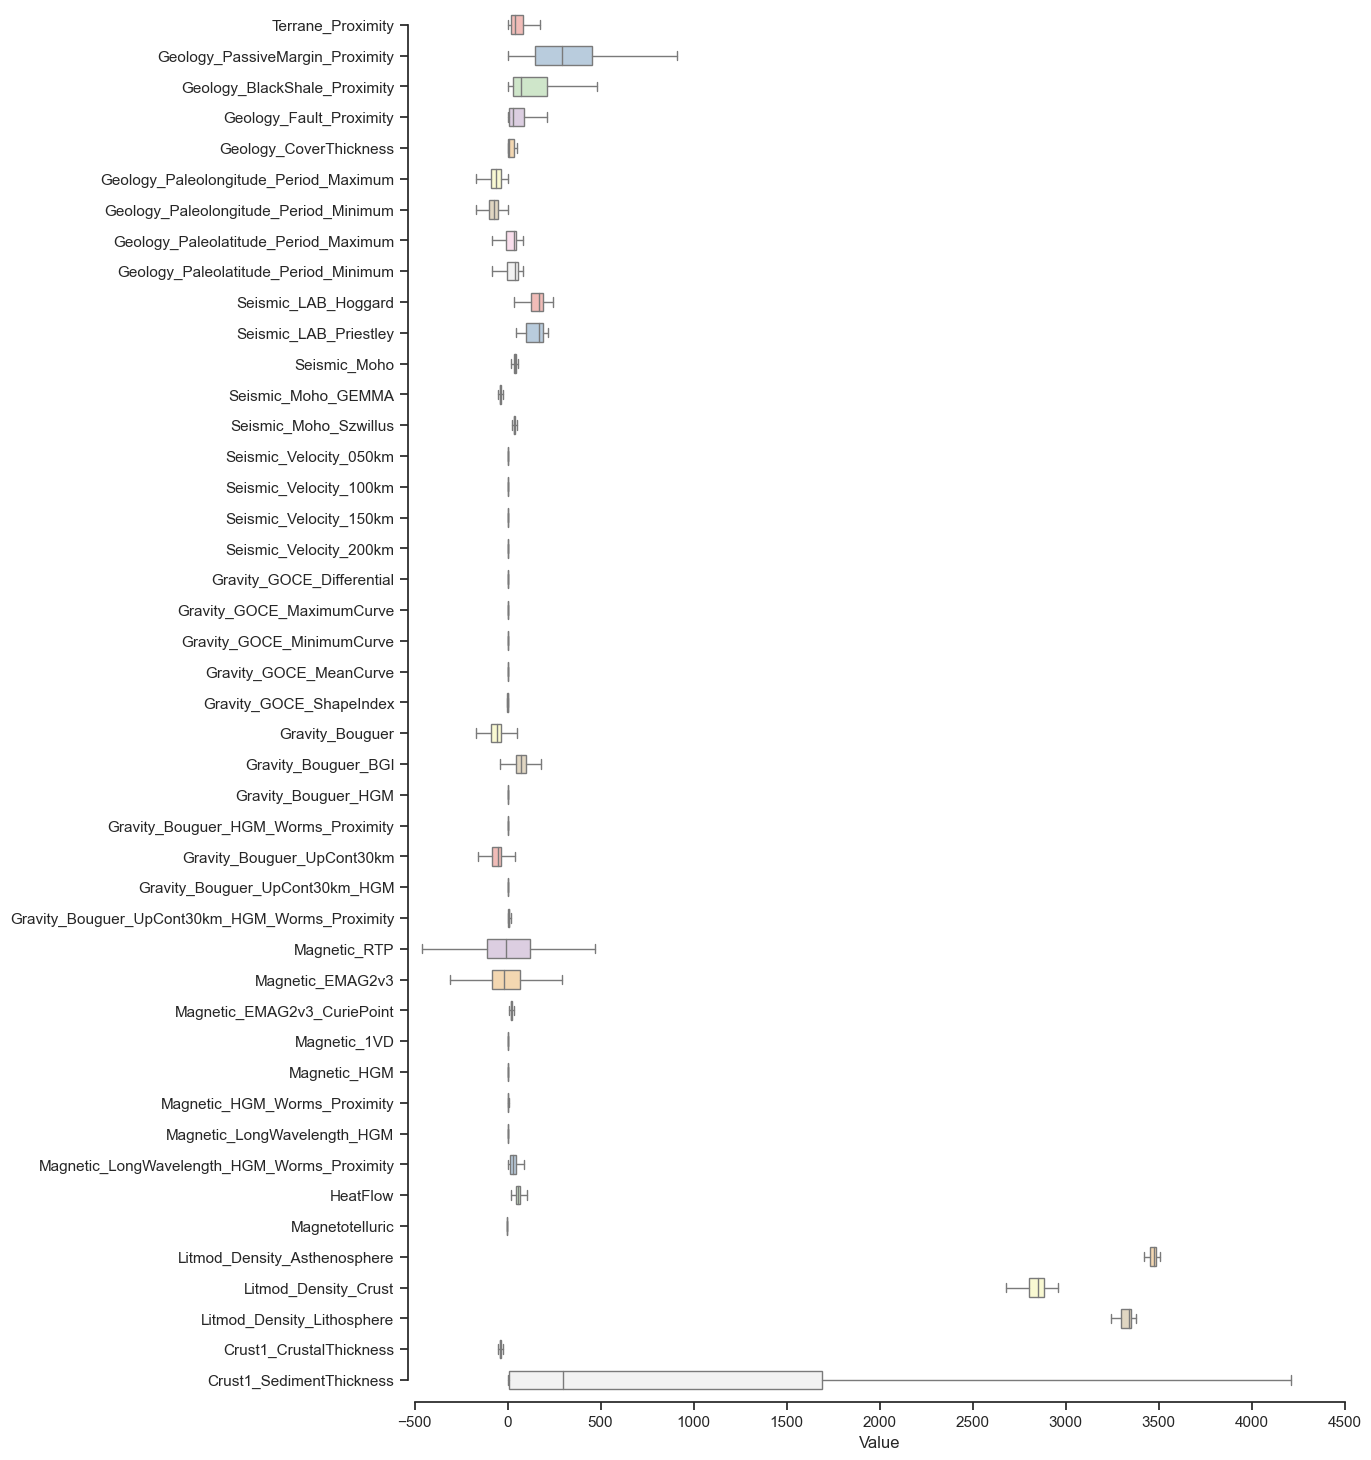

In [15]:
# Create correct dataframe shape
df_plot = pd.melt(df[numerical_cols], var_name="Feature", value_name="Value")

sns.set_theme(style="ticks")
sns.color_palette("Pastel1")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    fig, ax = plt.subplots(figsize=(12, 18))
    colors = sns.color_palette("Pastel1", n_colors=len(numerical_cols))

    sns.boxplot(x="Value", y="Feature",
                palette=colors,
                linewidth=1,
                fliersize=1, dodge=True, width=0.6, whis=1.5,
                showfliers=False,
                data=df_plot)
    
    ax.set_xlim(-500,4500)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.yaxis.label.set_visible(False)
    
    sns.despine(offset=5, trim=True)
    
    plt.plot();

### **Categorical** columns

In [11]:
# Hash categorical columns
categorical_cols = df.select_dtypes(include=object).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in geometry_cols and "Training" not in col]

df_categorical_features = pd.DataFrame({"Column Name": categorical_cols, "Source-Index": [df.columns.get_loc(col) for col in categorical_cols]})

# Append summary statistics to categorical_cols_df
categorical_summary = df[categorical_cols].describe().T[["unique"]]
categorical_summary = categorical_summary.rename(columns={"unique": "Classes"})

# Store unique values as a dictionary
unique_values_dict = {}
for column in categorical_cols:
  unique_values_dict[column] = df[column].unique().tolist()

# Append unique values to categorical_summary dataframe
categorical_summary["Values"] = categorical_summary.index.map(unique_values_dict)

# Merge dataframes
df_categorical_features = pd.merge(df_categorical_features, categorical_summary, left_on="Column Name", right_index=True)

# Naming
df_categorical_features = df_categorical_features.rename(columns=lambda x: x.capitalize())

# Append missing values count
missing_counts = df[categorical_cols].isnull().sum()
df_categorical_features["NaN"] = missing_counts.values

# Output
df_categorical_features


,Column name,Source-index,Classes,Values,NaN
0,Continent_Majority,5,1,"[North America, None]",107
1,Continent_Minority,6,1,"[North America, None]",107
2,Country_Majority,7,2,"[Canada, United States of America]",0
3,Country_Minority,8,3,"[Canada, United States of America, Mexico]",0
4,Province_Majority,9,63,"[Alberta, British Columbia, Northwest Territor...",0
5,Province_Minority,10,70,"[Alberta, British Columbia, Saskatchewan, Nort...",0
6,Terrane_Majority,11,211,"[Buffalo Head, Wabamun, Chinchaga, Hearne (cov...",0
7,Terrane_Minority,12,211,"[Buffalo Head, Wabamun, Chinchaga, Hearne (cov...",0
8,Terrane_Contact,13,2,"[Absent, Present]",0
9,Geology_Eon_Maximum_Majority,15,2,"[Phanerozoic, Precambrian, None]",44289


### **Ground truth** data

In [12]:
# Create combined (max) column for training points 
df[COL_GROUND_TRUTH_MAX] = df.apply(lambda row: "Present" if "Present" in [row["Training_MVT_Deposit"], row["Training_MVT_Occurrence"]] else "Absent", axis=1)


In [13]:
# Hash ground truth columns
ground_truth_cols = [col for col in df.columns if "Training_MVT" in col]
df_ground_truth_features = pd.DataFrame({"Column Name": ground_truth_cols, "Source-Index": [df.columns.get_loc(col) for col in ground_truth_cols]})

# Append summary statistics to ground_truth_cols_df
ground_truth_summary = df[ground_truth_cols].describe().T[["unique"]]
ground_truth_summary = ground_truth_summary.rename(columns=lambda x: x.capitalize())

# Store unique values as a dictionary
unique_values_dict = {}
for column in ground_truth_cols:
  unique_values_dict[column] = df[column].unique().tolist()
  
# Append unique values to ground_truth_summary dataframe
ground_truth_summary["Values"] = ground_truth_summary.index.map(unique_values_dict)

# Merge dataframes
df_ground_truth_features = pd.merge(df_ground_truth_features, ground_truth_summary, left_on="Column Name", right_index=True)
df_ground_truth_features = df_ground_truth_features.rename(columns=lambda x: x.capitalize())

# Append missing values count
missing_counts = df[ground_truth_cols].isnull().sum()
df_ground_truth_features["NaN"] = missing_counts.values

# Output
df_ground_truth_features


,Column name,Source-index,Unique,Values,NaN
0,Training_MVT_Deposit,93,2,"[Absent, Present]",0
1,Training_MVT_Occurrence,94,2,"[Absent, Present]",0
2,Training_MVT,97,2,"[Absent, Present]",0
